In-Progress

In [1]:
from PIL import Image
import numpy as np
import imageio as iio
import matplotlib.pyplot as plt
import glob
import os
import cv2


In [2]:
im = Image.open(r'C:\Users\pgmw9\Downloads\morphosource_media-10-items_download-9e5991ae\Media 000168325 - Element Unspecified CTImageSeries CT\KU-herp-75787-wholebody-000168325\KU-herp-75787-wholebody\KU-herp-75787-wholebody1116.tif')
#im.show()

imarray = np.array(im)

print(imarray.shape)
print(imarray.max())
print(imarray.min())

(534, 701)
61137
0


Visualize Slice from an image and show threshold values which allow bone segmentation

(534, 701)


c:\Users\pgmw9\Documents\Georgia Tech\HAAG\Lizard-Auto-Segmentation\venv\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  """Entry point for launching an IPython kernel.


(-0.5, 700.5, 533.5, -0.5)

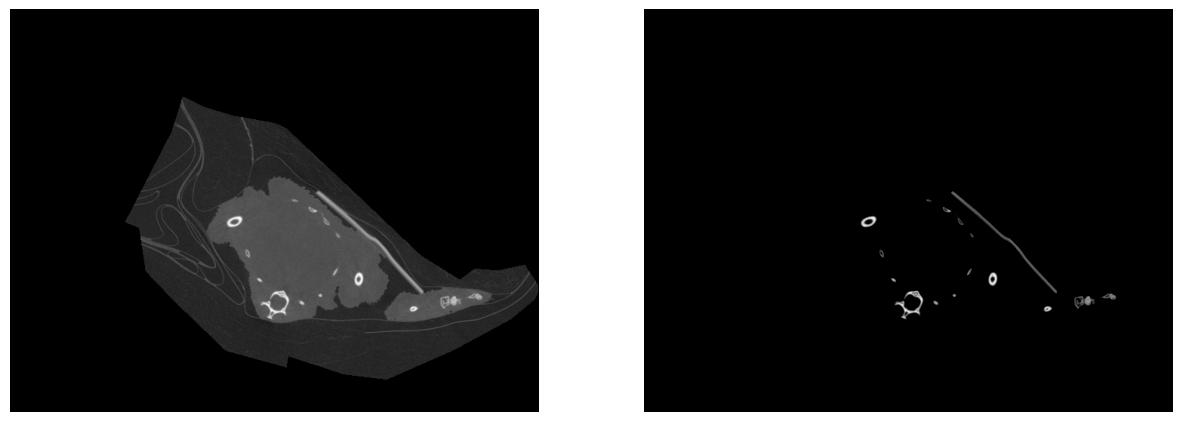

In [3]:
image_sequence = iio.imread(r'C:\Users\pgmw9\Downloads\morphosource_media-10-items_download-9e5991ae\Media 000168325 - Element Unspecified CTImageSeries CT\KU-herp-75787-wholebody-000168325\KU-herp-75787-wholebody\KU-herp-75787-wholebody0000.tif', format="TIFF")
print(image_sequence.shape)

fig, ax = plt.subplots(1, 2, figsize=(15, 10))
# Draw the image in grayscale
ax[0].imshow(im, cmap='gray')

# Draw the image with greater contrast
ax[1].imshow(im, cmap='gray', vmin=23000, vmax=62000)

# Remove axis ticks and labels
ax[0].axis('off')
ax[1].axis('off')

In [4]:
folder_path = 'C:/Users/pgmw9/Downloads/morphosource_media-10-items_download-9e5991ae/Media 000168325 - Element Unspecified CTImageSeries CT/KU-herp-75787-wholebody-000168325/KU-herp-75787-wholebody/'
tiflist = sorted([os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.tif')])
print(tiflist)

['C:/Users/pgmw9/Downloads/morphosource_media-10-items_download-9e5991ae/Media 000168325 - Element Unspecified CTImageSeries CT/KU-herp-75787-wholebody-000168325/KU-herp-75787-wholebody/KU-herp-75787-wholebody0000.tif', 'C:/Users/pgmw9/Downloads/morphosource_media-10-items_download-9e5991ae/Media 000168325 - Element Unspecified CTImageSeries CT/KU-herp-75787-wholebody-000168325/KU-herp-75787-wholebody/KU-herp-75787-wholebody0001.tif', 'C:/Users/pgmw9/Downloads/morphosource_media-10-items_download-9e5991ae/Media 000168325 - Element Unspecified CTImageSeries CT/KU-herp-75787-wholebody-000168325/KU-herp-75787-wholebody/KU-herp-75787-wholebody0002.tif', 'C:/Users/pgmw9/Downloads/morphosource_media-10-items_download-9e5991ae/Media 000168325 - Element Unspecified CTImageSeries CT/KU-herp-75787-wholebody-000168325/KU-herp-75787-wholebody/KU-herp-75787-wholebody0003.tif', 'C:/Users/pgmw9/Downloads/morphosource_media-10-items_download-9e5991ae/Media 000168325 - Element Unspecified CTImageSeries

Create Volume from list of tiff files

In [5]:
vol = np.stack([iio.imread(tif) for tif in tiflist], 0)

c:\Users\pgmw9\Documents\Georgia Tech\HAAG\Lizard-Auto-Segmentation\venv\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  """Entry point for launching an IPython kernel.


In [6]:
vol.shape

(1616, 534, 701)

(-0.5, 700.5, 533.5, -0.5)

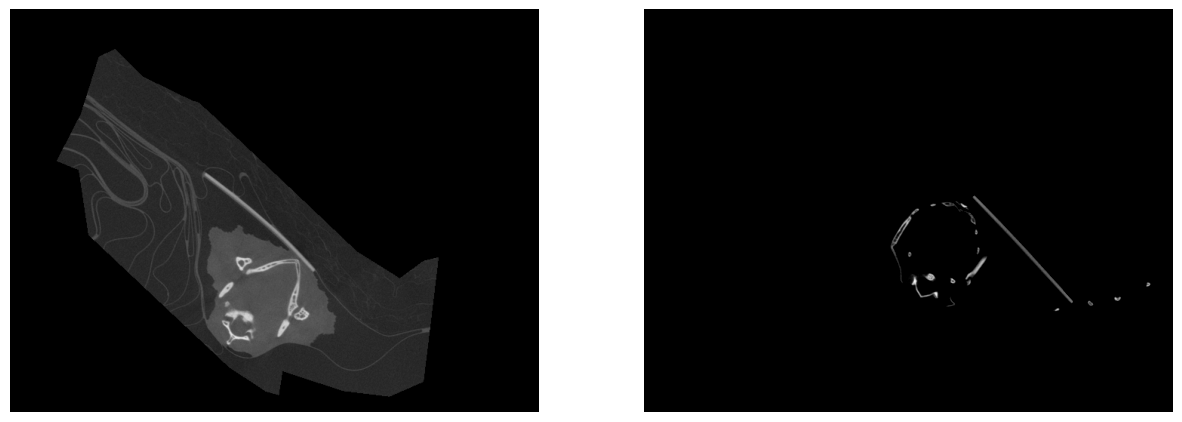

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
# Draw the image in grayscale
ax[0].imshow(vol[700, :, :], cmap='gray', vmin=0, vmax=62000)

# Draw the image with greater contrast
ax[1].imshow(vol[1200, :, :], cmap='gray', vmin=23000, vmax=62000)

# Remove axis ticks and labels
ax[0].axis('off')
ax[1].axis('off')

(-0.5, 533.5, 1615.5, -0.5)

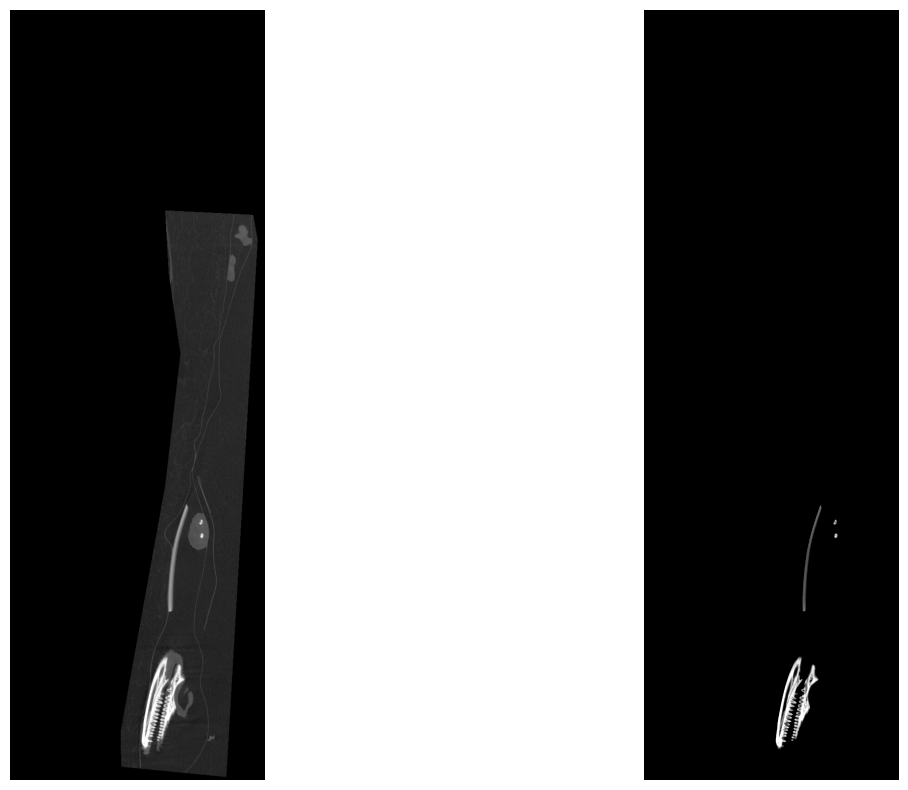

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
# Draw the image in grayscale
ax[0].imshow(vol[:, :, 520], cmap='gray', vmin=0, vmax=62000)

# Draw the image with greater contrast
ax[1].imshow(vol[:, :, 520], cmap='gray', vmin=23000, vmax=62000)

# Remove axis ticks and labels
ax[0].axis('off')
ax[1].axis('off')

(-0.5, 700.5, 1615.5, -0.5)

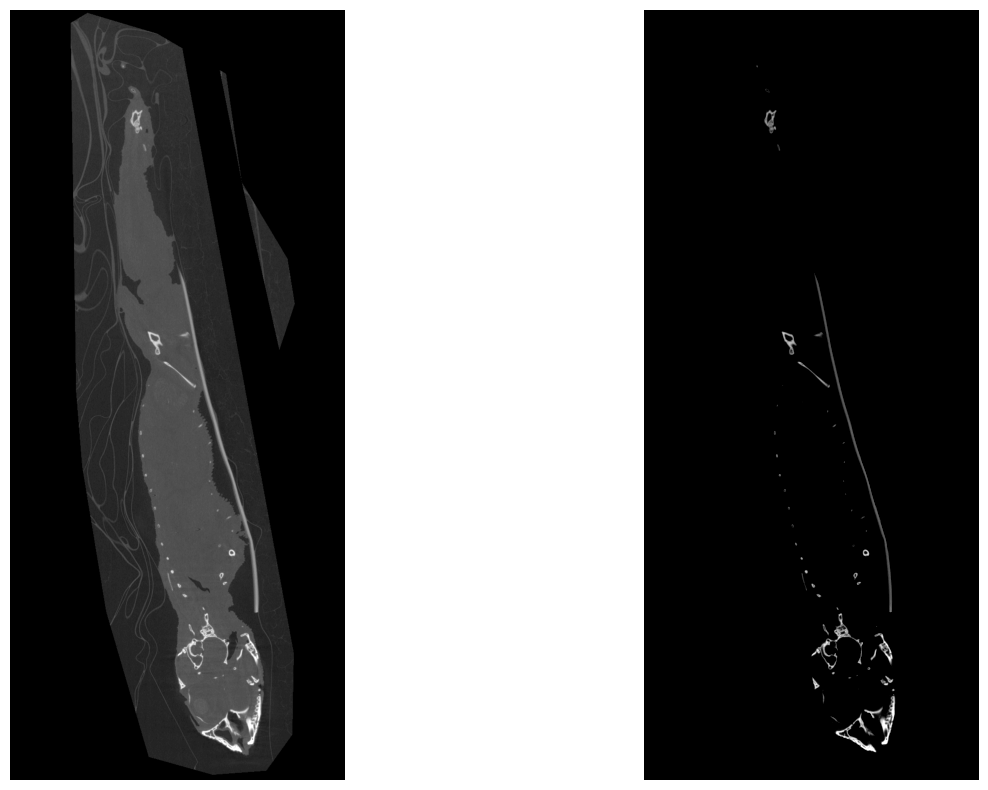

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
# Draw the image in grayscale
ax[0].imshow(vol[:,330, :], cmap='gray', vmin=0, vmax=62000)

# Draw the image with greater contrast
ax[1].imshow(vol[:, 330, :], cmap='gray', vmin=23000, vmax=62000)

# Remove axis ticks and labels
ax[0].axis('off')
ax[1].axis('off')

boundig box on lateral view to find ROI? 3D segmentation on ROI

(-0.5, 700.5, 1615.5, -0.5)

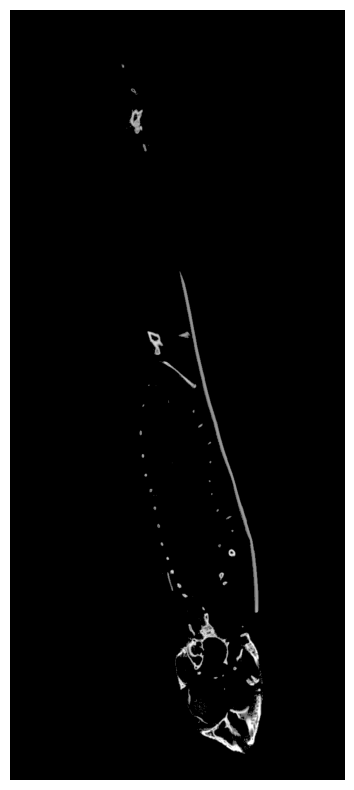

In [28]:
vol2 = vol.copy()
vol2[vol2 <= 23000] = 0


fig, ax = plt.subplots(1, 1, figsize=(15, 10))
# Draw the image in grayscale
ax.imshow(vol2[:,330, :], cmap='gray', vmin=0, vmax=62000)

# Remove axis ticks and labels
ax.axis('off')

In [39]:
vol2 = vol2.astype('float64')
vol2 *= (255.0/vol2.max())
contours,hierarchy = cv2.findContours(vol2[:, 330, :], cv2.RETR_FLOODFILL, 2)

cnt = contours
rect = cv2.minAreaRect(cnt[0])
box = cv2.boxPoints(rect)
box = np.int0(box)
cv2.drawContours(img,[box],0,(0,0,255),2)

error: OpenCV(4.10.0) C:\Users\pgmw9\AppData\Local\Temp\pip-install-k0kl2ol3\opencv-python\opencv\modules\imgproc\src\contours_new.cpp:325: error: (-2:Unspecified error) in function 'class std::shared_ptr<struct ContourScanner_> __cdecl ContourScanner_::create(class cv::Mat,int,int,class cv::Point_<int>)'
> RETR_FLOODFILL mode supports only CV_32SC1 images (expected: 'img.type() == CV_32SC1'), where
>     'img.type()' is 6 (CV_64FC1)
> must be equal to
>     'CV_32SC1' is 4 (CV_32SC1)


Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.


(304, 157, 167)


(-0.5, 166.5, 303.5, -0.5)

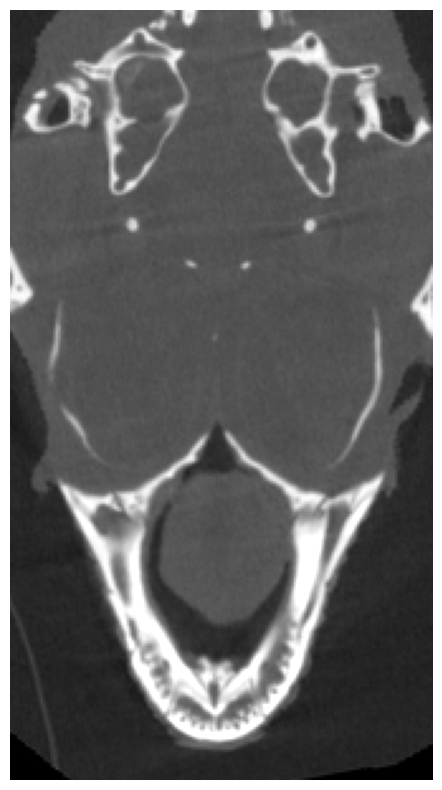

In [64]:
i = iio.imread(r"C:\Users\pgmw9\OneDrive\Documents\KU-herp-75787-wholebody0000 cropped.nrrd")
print(i.shape)

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
# Draw the image in grayscale
ax.imshow(i[:, 80, :], cmap='gray', vmin=0, vmax=62000)

# Remove axis ticks and labels
ax.axis('off')

(608, 314, 334)
1


Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.


(-0.5, 333.5, 607.5, -0.5)

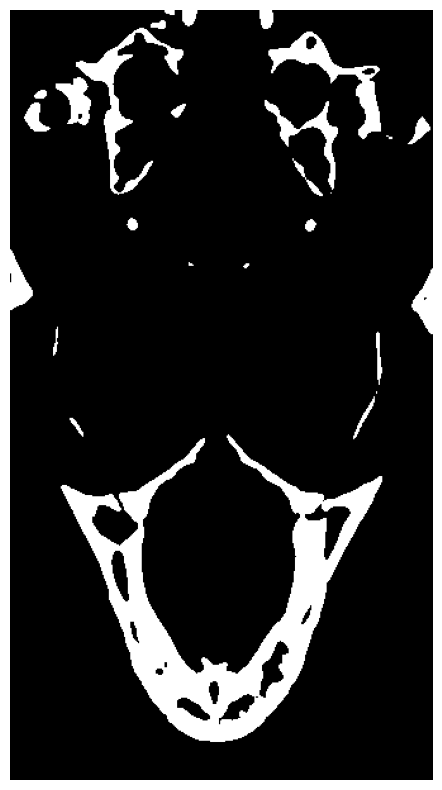

In [66]:
i = iio.imread(r"C:\Users\pgmw9\OneDrive\Documents\KU-herp-75787-wholebody0000 cropped Segmentation test.seg.nrrd")
print(i.shape)
print(i.max())

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
# Draw the image in grayscale
ax.imshow(i[:, 160, :], cmap='gray', vmin=0, vmax=1)

# Remove axis ticks and labels
ax.axis('off')

Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.


(304, 157, 167)
45 0
(304, 157, 167)
65535 0


(-0.5, 166.5, 303.5, -0.5)

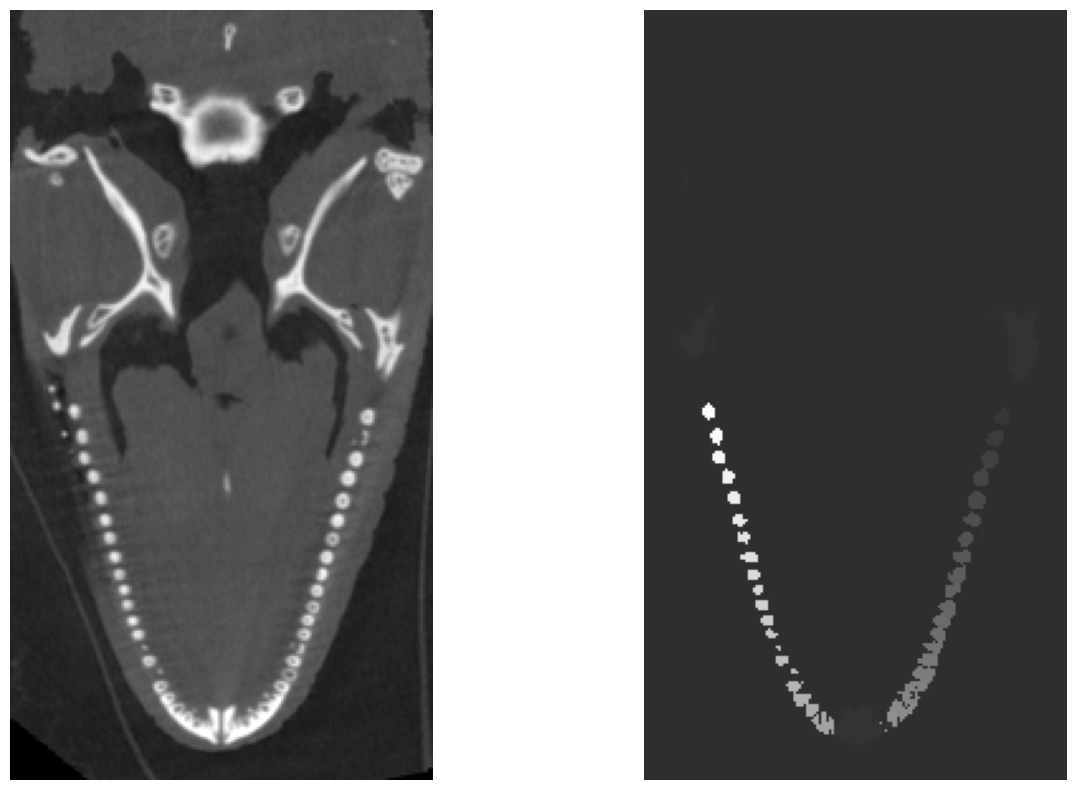

In [9]:
f = iio.imread(r"C:\Users\pgmw9\OneDrive\Documents\KU-herp-75787-wholebody0000 cropped.seg.nrrd")
print(f.shape)
print(f.max(), f.min())

vol = iio.imread(r"C:\Users\pgmw9\OneDrive\Documents\KU-herp-75787-wholebody0000 cropped.nrrd")
print(vol.shape)
print(vol.max(), vol.min())

fig, ax = plt.subplots(1, 2, figsize=(15, 10))
# Draw the image in grayscale
ax[0].imshow(vol[:, 113, :], cmap='gray', vmin=0, vmax=65535)

# Draw the image with greater contrast
ax[1].imshow(f[:, 113, :], cmap='gray', vmin=-10, vmax=45)

# Remove axis ticks and labels
ax[0].axis('off')
ax[1].axis('off')